# Sales Analysis 

### Introduction:
    > This notebook explores a dataset that provides insights into the sales of a company over an 11-month period
    > The primary goal of the notebook is to perform comprehensive data wrangling to prepare the data for visualization and and also analyse and explore the data to answer questions and make some business decisions.
    > The notebook addresses various questions based on the data, including:: 
    1. Identifying the month with the highest sales and determining the corresponding sales amount.
    2. Analyzing the product that recorded the highest sales and the product that had the highest quantity sold.
    3. Evaluating the sales performance of different cities for each product.
    4. Examining the sales trends in the years 2019 and 2020 and analyzing the performance across different quarters of each year.
    5. Identifying the time when customers make the most purchases. This information can be valuable for staffing decisions and optimizing advertising campaigns.
    6. Determining which products are frequently sold together. This analysis can assist in inventory management and targeted advertising strategies.
    
    
    
    >By addressing these questions, the notebook aims to provide valuable insights into the company's sales patterns and enable data-driven decision-making for various aspects of the business, including staffing, advertisement planning, and product stocking.

###### importing necessary libraries

In [84]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

##### Read all files from the system, save to dataframe , and save to csv

In [2]:

path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_sales.csv", index=False)
    

In [86]:
#importing dataframe
sales_df = pd.read_csv("all_sales.csv")


In [87]:
# high-level overview of data shape and composition
print(sales_df.shape,"\n")
print(sales_df.dtypes,"\n")
display(sales_df.sample(3))

(186850, 6) 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object 



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
61691,156389,Lightning Charging Cable,1,14.95,02/01/19 09:02,"80 Pine St, New York City, NY 10001"
69321,142923,Lightning Charging Cable,1,14.95,01/04/19 23:17,"949 2nd St, San Francisco, CA 94016"
57781,152669,USB-C Charging Cable,1,11.95,02/22/19 23:12,"488 11th St, New York City, NY 10001"


In [7]:
#checking for null values
sales_df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [65]:
#checking for duplicates
sales_df.duplicated().sum()

264

In [67]:
sales_df[sales_df.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1
1302,177795,Apple Airpods Headphones,1,150.00,2019-04-27 19:45:00,"740 14th St, Seattle, WA 98101",4,Seattle (WA),150.00,19,45,1
1684,178158,USB-C Charging Cable,1,11.95,2019-04-28 21:13:00,"197 Center St, San Francisco, CA 94016",4,San Francisco (CA),11.95,21,13,1
3805,180207,Apple Airpods Headphones,1,150.00,2019-04-13 01:46:00,"196 7th St, Los Angeles, CA 90001",4,Los Angeles (CA),150.00,1,46,1
4196,180576,Lightning Charging Cable,1,14.95,2019-04-18 17:23:00,"431 Park St, Dallas, TX 75001",4,Dallas (TX),14.95,17,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
184940,257530,USB-C Charging Cable,1,11.95,2019-09-03 11:13:00,"192 Johnson St, San Francisco, CA 94016",9,San Francisco (CA),11.95,11,13,1
186173,258715,Lightning Charging Cable,1,14.95,2019-09-15 16:50:00,"550 10th St, Portland, OR 97035",9,Portland (OR),14.95,16,50,1
186508,259035,27in FHD Monitor,1,149.99,2019-09-29 13:52:00,"327 Lake St, San Francisco, CA 94016",9,San Francisco (CA),149.99,13,52,1
186782,259296,Apple Airpods Headphones,1,150.00,2019-09-28 16:48:00,"894 6th St, Dallas, TX 75001",9,Dallas (TX),150.00,16,48,1


In [88]:
#taking a descriptive statistics
sales_df.describe().T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


### From overview of the data:
    > it was noticed that the data has 186850 rows and 6 columns
    > The dataset has 545 missing values accross the rows and columns
    > The dataset has inappropriate  data type for 'Quantity', 'Ordered Price', 'Each Order Date'
    

# Data Wrangling

### Missing Values

In [8]:
# Find NAN
nan_df = sales_df[sales_df.isna().any(axis=1)]
nan_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
#dropping the missing values
sales_df = sales_df.dropna(how='all')
sales_df= sales_df.reset_index()
#confirming if they've been dropped
sales_df.isna().sum()

index               0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
#### Make columns correct type

In [97]:
# It was discovered that some rows and columns had inappropriate values and this is then adjusted
sales_df.loc[sales_df['Order ID'] == "Order ID"]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...,...
184624,185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [98]:
sales_df = sales_df[sales_df['Order ID'].str[0:2]!='Or']

### Inappropiate Data Types

In [99]:
#Assigning the correct data type to the mis lablled columns
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])


### Data Augmentation with New Columns

##### augmenting with some date and time columns

In [126]:
#extract month
sales_df['Month'] = sales_df['Order Date'].dt.month
# extract day of the week(Mon-Sun)
sales_df['day_of_week'] = pd.to_datetime(sales_df['Order Date']).dt.day_name()
#Extract day
sales_df['day'] = pd.to_datetime(sales_df['Order Date']).dt.day
# extract hour
sales_df['hour'] = pd.to_datetime(sales_df['Order Date']).dt.hour
#Extract time period into morning, afternoon or night
sales_df['period_of_day'] = 'Morning'
sales_df['period_of_day'][(sales_df['hour'] >= 12) & (sales_df['hour'] <= 19)] = 'Afternoon'
sales_df['period_of_day'][(sales_df['hour'] >19) & (sales_df['hour'] <= 23)] = 'Night'
#adding minute
sales_df['Minute'] = pd.to_datetime(sales_df['Order Date']).dt.minute

# print the added columns
print(sales_df[['day_of_week','hour','period_of_day']].sample(3))

       day_of_week  hour period_of_day
175978      Monday    22         Night
10217       Monday     8       Morning
68789     Saturday    19     Afternoon


C:\Users\USER\AppData\Local\Temp\ipykernel_6812\2301366531.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['period_of_day'][(sales_df['hour'] >= 12) & (sales_df['hour'] <= 19)] = 'Afternoon'
C:\Users\USER\AppData\Local\Temp\ipykernel_6812\2301366531.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['period_of_day'][(sales_df['hour'] >19) & (sales_df['hour'] <= 23)] = 'Night'


##### Add city column

In [105]:
#functions to axtract state and city from the adress
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_df['City'] = sales_df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
sales_df.sample(2)

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,day_of_week,day,hour,period_of_day,Month,City
109090,109414,165952,Apple Airpods Headphones,1,150.0,2019-03-13 20:03:00,"514 North St, Los Angeles, CA 90001",Wednesday,13,20,Night,3,Los Angeles (CA)
23763,23832,241899,iPhone,1,700.0,2019-08-27 23:04:00,"317 Wilson St, New York City, NY 10001",Tuesday,27,23,Night,8,New York City (NY)


##### Add sales column

In [109]:
sales_df['Sales'] = sales_df['Quantity Ordered'].astype('int') * sales_df['Price Each'].astype('float')

In [110]:
#Information about our eventual dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186304
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             185950 non-null  int64         
 1   Order ID          185950 non-null  object        
 2   Product           185950 non-null  object        
 3   Quantity Ordered  185950 non-null  int64         
 4   Price Each        185950 non-null  float64       
 5   Order Date        185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   day_of_week       185950 non-null  object        
 8   day               185950 non-null  int64         
 9   hour              185950 non-null  int64         
 10  period_of_day     185950 non-null  object        
 11  Month             185950 non-null  int64         
 12  City              185950 non-null  object        
 13  Sales             185950 non-null  float64       
dtypes: d

## Data Exploration!

## Function for Plot counts


In [76]:
##Function for plotting
def countPlot(df,xVar,hue=None,order=None,annot=True,hue_order=None):
    
    # set plot dimension
    plt.figure(figsize=[14, 5])
            
    #choose base color
    base_color = sns.color_palette()[0]
    #plot
    sns.countplot(data = df, x = xVar,hue=hue, color = base_color,order=order,edgecolor='black',linewidth=2,hue_order=hue_order)
    if annot:
            var_counts = df[xVar].value_counts() 
            total_rides = var_counts.sum()
            # print frequency on the bar chart
            locs, labels = plt.xticks(size=14)
            for loc, label in zip(locs, labels):                
                count = var_counts[label.get_text()]
                pct_string = '{:0.1f}%'.format(100*count/total_rides)
                plt.text(loc, count-15000, pct_string, ha='center',color='white',fontsize=12)
               
    #after plotting,clean up varialble names
    xVar = xVar.replace('_',' ')#replace with a space
    if hue:
              hue = hue.replace('_',' ') 
            
    
    #Add title and format it 
    plt.title(f'''Distribution of {xVar} {'by' if hue else ''} {hue if hue else ''}'''.title(),fontsize=14,weight='bold')
    #xlabel and formatting
    plt.xlabel(xVar.title(),fontsize=10,weight='bold')
    #xlabel and formatting
    plt.ylabel('Sales'.title(),fontsize=10,weight='bold')
    
plt.show()

### What was the best month for sales and how much was sold?

In [146]:
sales_by_month = sales_df.groupby(pd.Grouper(key='Order Date', freq='M')).sum()['Sales']
#sales_by_month=sales_by_month.sort_values(ascending=False)
sales_by_month

Order Date
2019-01-31    1813586.44
2019-02-28    2202022.42
2019-03-31    2807100.38
2019-04-30    3390670.24
2019-05-31    3152606.75
2019-06-30    2577802.26
2019-07-31    2647775.76
2019-08-31    2244467.88
2019-09-30    2097560.13
2019-10-31    3736726.88
2019-11-30    3199603.20
2019-12-31    4613443.34
2020-01-31       8670.29
Freq: M, Name: Sales, dtype: float64

Text(0.5, 1.0, 'moths')

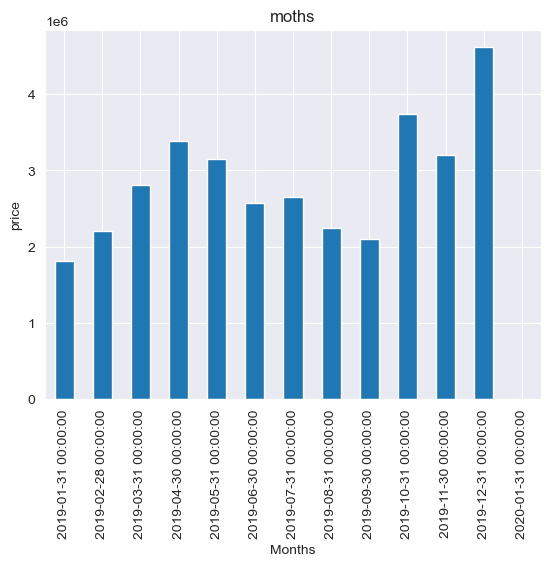

In [158]:
sales_by_month.plot(kind='bar')
plt.xlabel('Months')
plt.ylabel('price')
plt.title('moths')

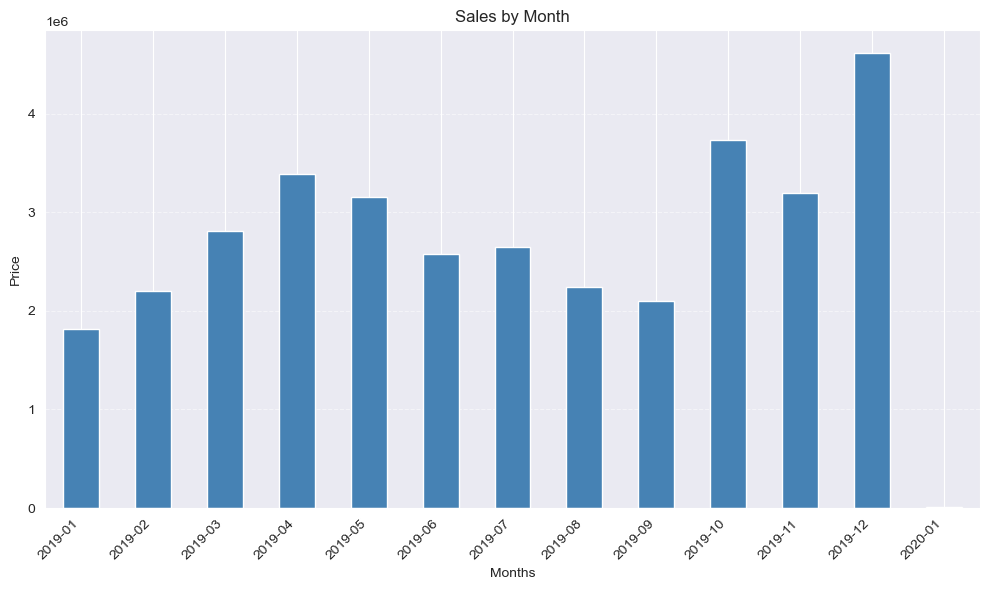

In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the index to a datetime object
sales_by_month.index = pd.to_datetime(sales_by_month.index)

# Create a sequence of all dates in the desired range
date_range = pd.date_range(start=sales_by_month.index.min(), end=sales_by_month.index.max(), freq='M')

# Reindex the sales_by_month DataFrame with the complete date range
sales_by_month = sales_by_month.reindex(date_range)

# Fill missing values with 0
sales_by_month = sales_by_month.fillna(0)

# Create the bar plot
ax = sales_by_month.plot(kind='bar', figsize=(10, 6), color='steelblue')

# Set the x and y-axis labels
ax.set_xlabel('Months')
ax.set_ylabel('Sales')

# Set the title
ax.set_title('Sales by Month')

# Rotate and align the x-axis labels for better readability
ax.set_xticklabels(sales_by_month.index.strftime('%Y-%m'), rotation=45, ha='right')

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Remove the legend (optional)
ax.legend().remove()

# Show the plot
plt.tight_layout()
plt.show()


#### It can be noticed that theDecember 2019 recorded most sales and least sales were recorded in January (both 2019 and 2020)

### What Product Sold the Most

In [42]:
sales_df[['Product','Sales']].groupby(['Product']).sum().sort_values(by='Sales',ascending=False)

,Sales
Product,
Macbook Pro Laptop,8037600.00
iPhone,4794300.00
ThinkPad Laptop,4129958.70
Google Phone,3319200.00
27in 4K Gaming Monitor,2435097.56
34in Ultrawide Monitor,2355558.01
Apple Airpods Headphones,2349150.00
Flatscreen TV,1445700.00
Bose SoundSport Headphones,1345565.43


In [45]:
sales_df[['Product','Quantity Ordered','Sales']].groupby(['Product']).sum().sort_values(by='Quantity Ordered',ascending=False)

,Quantity Ordered,Sales
Product,,
AAA Batteries (4-pack),31017,92740.83
AA Batteries (4-pack),27635,106118.40
USB-C Charging Cable,23975,286501.25
Lightning Charging Cable,23217,347094.15
Wired Headphones,20557,246478.43
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
27in FHD Monitor,7550,1132424.50
iPhone,6849,4794300.00


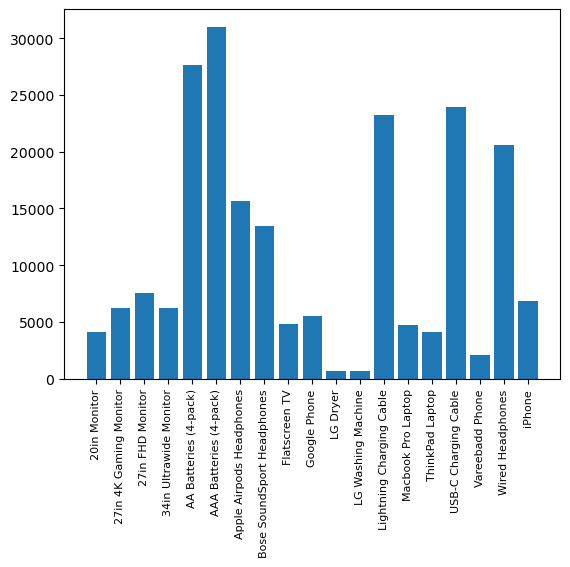

In [46]:
product_group = sales_df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### From the above exploration, it can be discovered that even though:
    Macbook Pro Laptop, iPhone,ThinkPad Laptop broght more of the sale sales, the most sold items are AAA Batteries (4-pack),AA Batteries (4-pack) USB-C Charging Cable Lightning Charging Cable

## What city sold the most product?

In [56]:
city_sales=sales_df.groupby('City')['Sales'].sum().nlargest(5)
city_sales

City
San Francisco  (CA)    8262203.91
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Boston  (MA)           3661642.01
Atlanta  (GA)          2795498.58
Name: Sales, dtype: float64

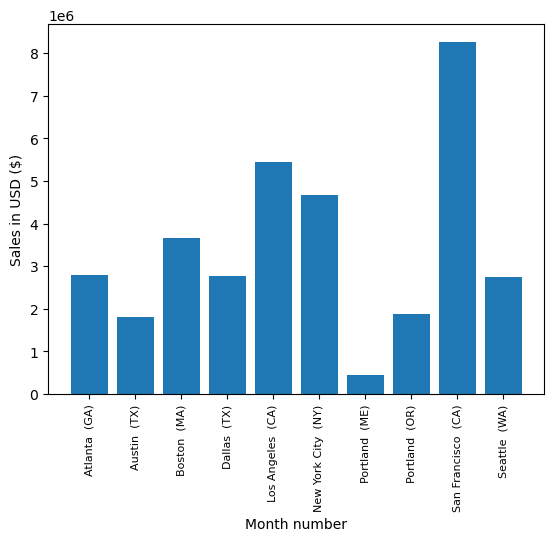

In [30]:
keys = [city for city, df in sales_df.groupby(['City'])]

plt.bar(keys,sales_df.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

#### It can be seen that San FRancisco, Los Angeles are sold the most products and Portland sold the least product


## How did the cities fair in their respective Product Sale?

In [165]:
sales_df.groupby(['City','Product'])['Sales'].sum()

City           Product               
Atlanta  (GA)  20in Monitor               37616.58
               27in 4K Gaming Monitor    192265.07
               27in FHD Monitor           88194.12
               34in Ultrawide Monitor    183155.18
               AA Batteries (4-pack)       8421.12
                                           ...    
Seattle  (WA)  ThinkPad Laptop           332996.67
               USB-C Charging Cable       22334.55
               Vareebadd Phone            71600.00
               Wired Headphones           19807.48
               iPhone                    382200.00
Name: Sales, Length: 190, dtype: float64

### How did the sales go in year 2019 and 2020 and in different quarters of the year

In [162]:
## sales_by_year = sales_df.groupby(pd.Grouper(key='Order Date', freq='Y'))['Sales'].sum()
sales_by_year

Order Date
2019-12-31    34483365.68
2020-12-31        8670.29
Freq: A-DEC, Name: Sales, dtype: float64

In [161]:
sales_by_year_quarter = sales_df.groupby(pd.Grouper(key='Order Date', freq='Q'))['Sales'].sum()
sales_by_year_quarter

Order Date
2019-03-31     6822709.24
2019-06-30     9121079.25
2019-09-30     6989803.77
2019-12-31    11549773.42
2020-03-31        8670.29
Freq: Q-DEC, Name: Sales, dtype: float64

#### It can be seen that:
    >Year 2019 had 34483365.68 sales and january 2022 had 8670.29
    >When checking the quarterly entry of sales, it was discovered that most sales where came in the the last quarter of the year and this also be seen from increase in the December sales. 

## What time do our customers buy more products?This can be important for planning in terms of staffing and when to put up advetisement

In [163]:
sales_df['Count'] = 1


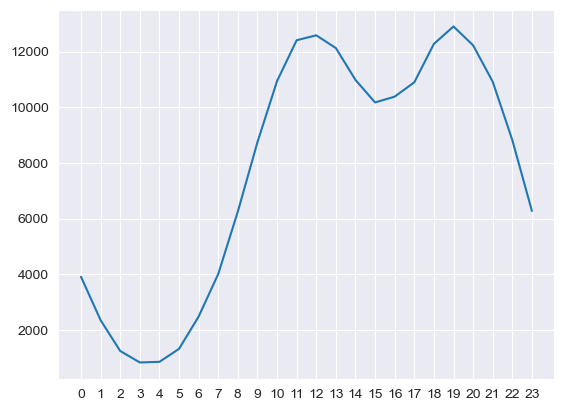

In [164]:
keys = [pair for pair, df in sales_df.groupby(['hour'])]

plt.plot(keys, sales_df.groupby(['hour']).count()['Count'])
plt.xticks(keys)
#plt.grid()
plt.show()

# More transactions are made around 11am and 7pm.It can be recommended that the advert is put on slightly before 11am or 7pm

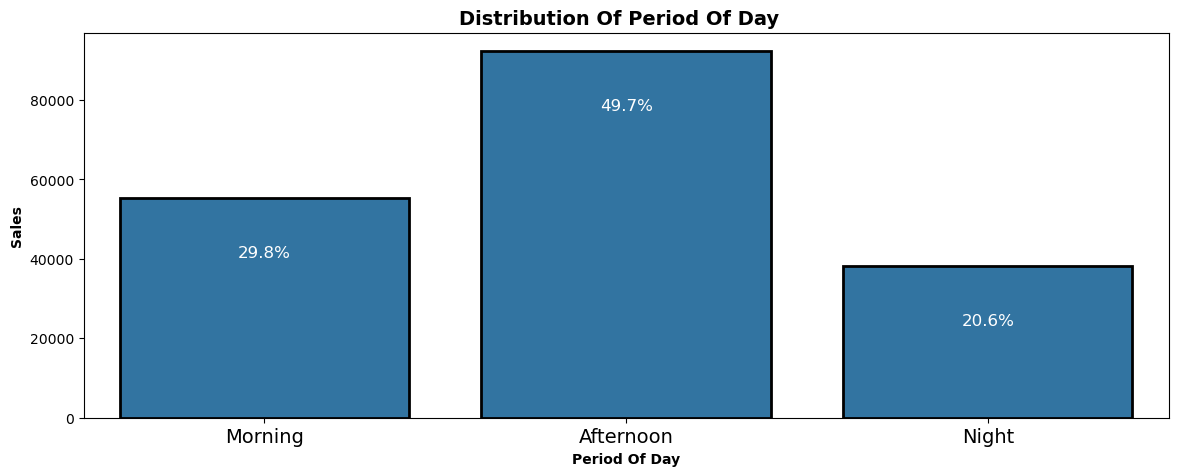

In [81]:
#order
period_order=['Morning','Afternoon','Night']
#calling function to plot graph
countPlot(sales_df,'period_of_day',order=period_order)

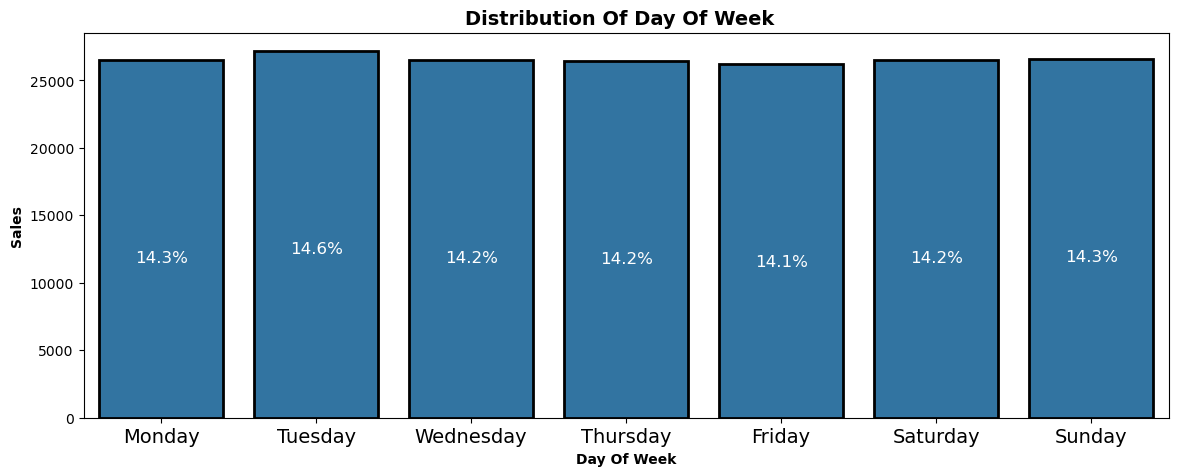

In [77]:
#day order
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
#calling function to plot graph
countPlot(sales_df,'day_of_week',order=day_order)

#### It can be noticed that the sales is evenly disctributed accross the week

### It is noticed that:
    >More transactions are made around 11am and 7pm.It can be recommended that the advert is put on slightly before 11am or 7pm    
    >Most of the transactions(49.7%) are made within the afternoon period(12pm - 7pm) and this can be used to make a decision of putting more stafe for this shift as compared to morning and night
    >Sales are evenly distributed among different days of the week, this therefore accounts for can translate to equal daily shifts among staffs without any deficit on the weekends
    >

## What products are most often sold together?

In [48]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = sales_df[sales_df['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\USER\AppData\Local\Temp\ipykernel_6812\2864652352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [49]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
